<a href="https://colab.research.google.com/github/Bosy-Ayman/DSAI-456-Speech/blob/main/Assignment_1_Speech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Write a Python program that reads an audio file and extracts key sound features such as intensity (loudness) and pitch (fundamental frequency). Then plot these features as functions of time to analyze how they vary throughout the audio.



In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio

# Load The audio file

In [ ]:

file_path = '/content/hi,how are you.mp3'
waveform, sample_rate = librosa.load(file_path)


In [ ]:
Audio(data=waveform, rate=sample_rate)


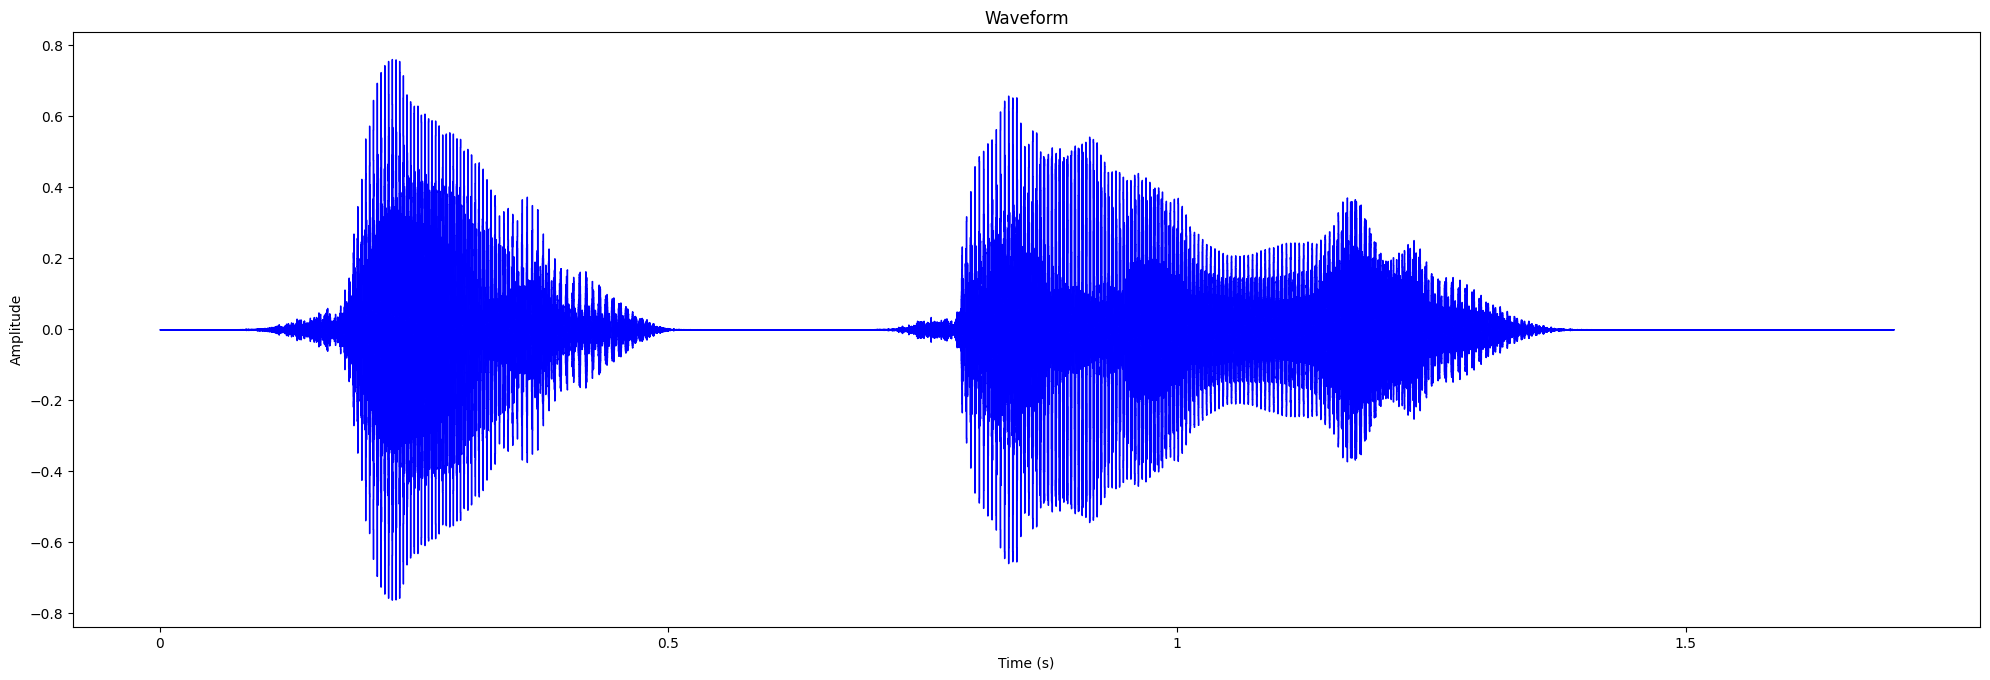

In [ ]:
plt.figure(figsize=(20, 13))
plt.subplot(2, 1, 1)

librosa.display.waveshow(waveform, sr=sample_rate ,color='blue')
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()


# Calculate intensity: how strong or powerful the sound wave is


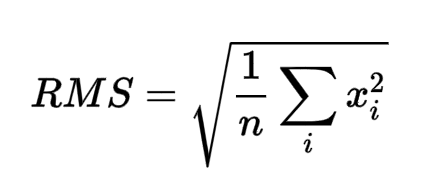

In [ ]:
rms.shape

(74,)

In [ ]:
rms = librosa.feature.rms(y=waveform)[0]

In [ ]:
times_rms = librosa.times_like(rms, sr=sample_rate)

In [ ]:
db = librosa.amplitude_to_db(rms, ref=np.max)


Text(0, 0.5, 'RMS Energy')

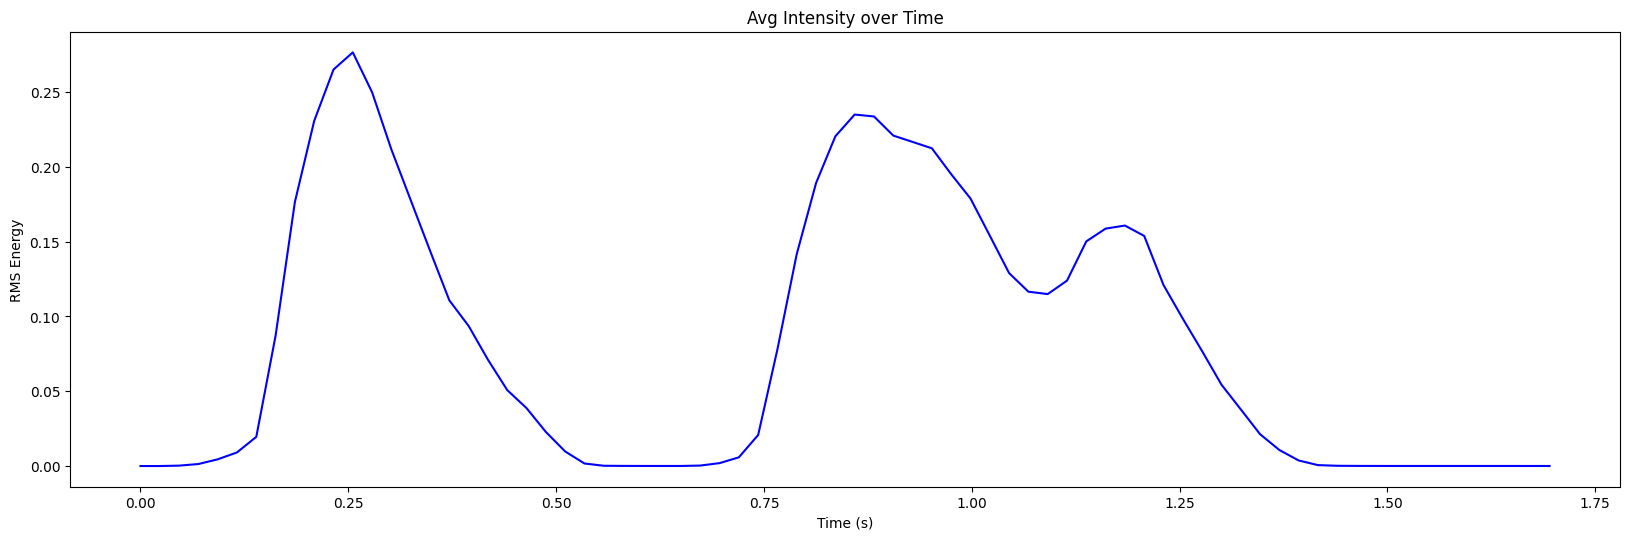

In [ ]:
plt.figure(figsize=(20, 13))
plt.subplot(2, 1, 1)
plt.plot(times_rms, rms, color='b')
plt.title('Avg Intensity over Time')
plt.xlabel('Time (s)')
plt.ylabel('RMS Energy')



---



# (2) Loudness

In [ ]:

db_values = 10 * np.log10(rms**2)
times_db = librosa.times_like(db_values, sr=sample_rate)


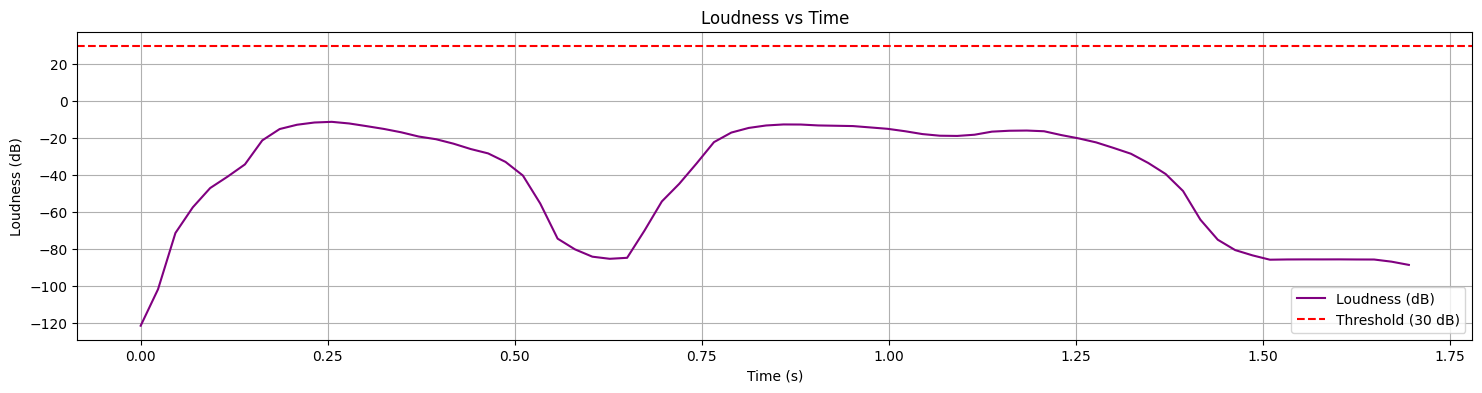

In [ ]:
threshold_db = 30

plt.figure(figsize=(18, 4))

plt.plot(times_db, db_values, color='purple', label='Loudness (dB)')

plt.axhline(threshold_db, color='r', linestyle='--', label=f'Threshold ({threshold_db} dB)')

plt.title("Loudness vs Time")
plt.xlabel("Time (s)")
plt.ylabel("Loudness (dB)")
plt.legend()
plt.grid(True)
plt.show()

# Calculate Pitch (Tone)

| Sound type          | Typical pitch range (Hz) | Example values       |
| ------------------- | ------------------------ | -------------------- |
| Male voice          | ~85–180 Hz               | `fmin=50, fmax=200`  |
| Female voice        | ~165–255 Hz              | `fmin=100, fmax=300` |


In [ ]:
frequency = librosa.yin(waveform, fmin=50, fmax=700, sr=sample_rate)
times_frequency = librosa.times_like(frequency, sr=sample_rate)


# Plot intensity and pitch over time


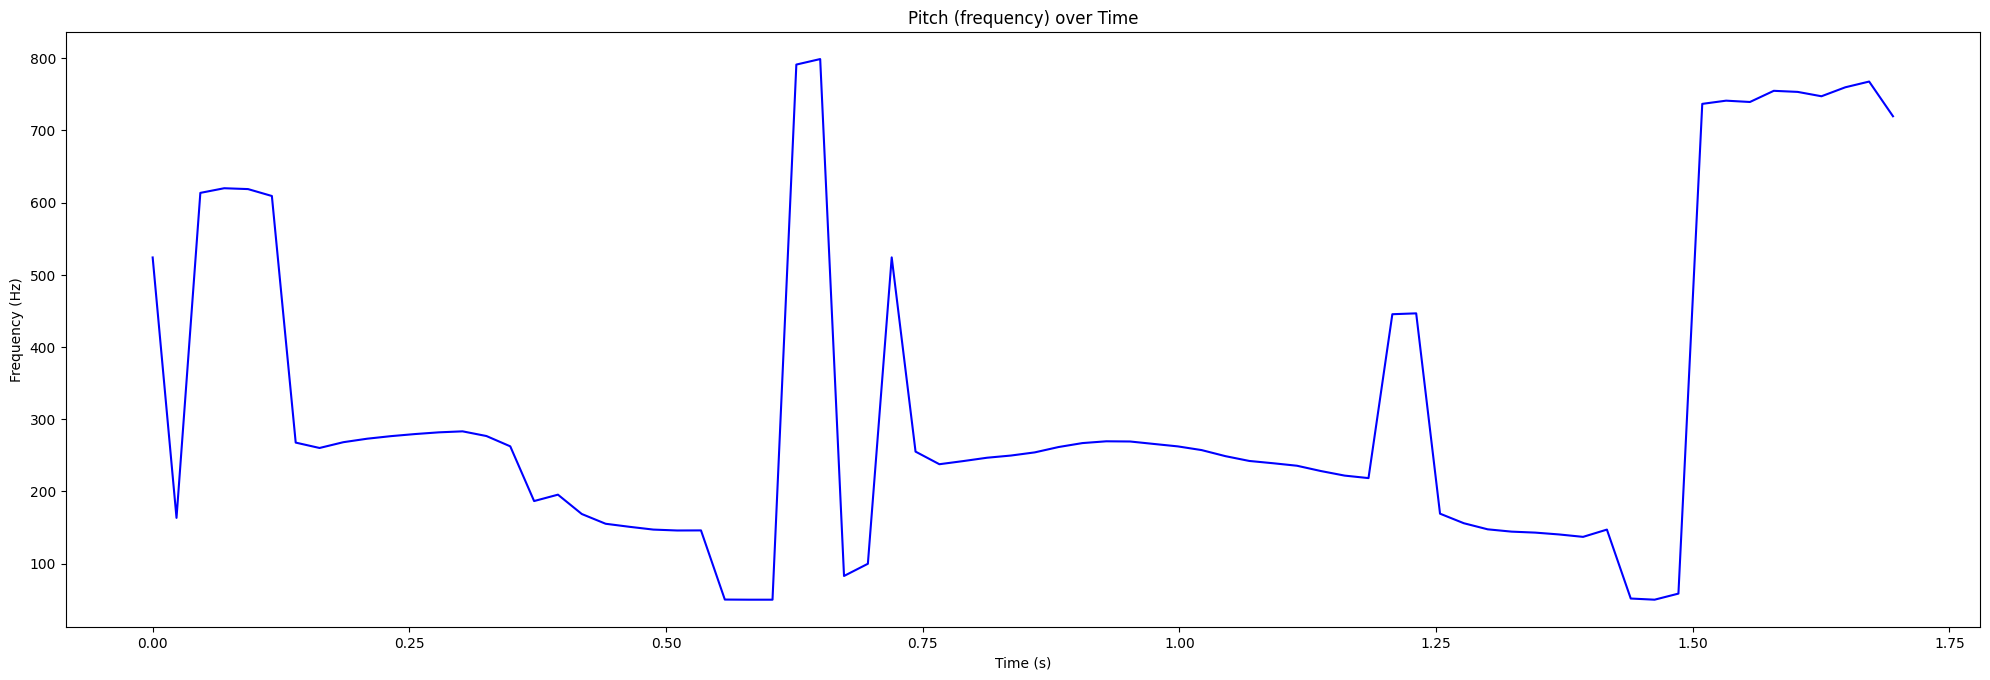

In [ ]:

plt.figure(figsize=(20, 13))
plt.subplot(2, 1, 2)
plt.plot(times_frequency, frequency, color='b')
plt.title('Pitch (frequency) over Time')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

plt.tight_layout()
plt.show()